# Campus Recruitment 

### Importing Modules

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr

### Data Gathering

* https://www.kaggle.com/benroshan/factors-affecting-campus-placement

<font color = 'green'>This data set consists of Placement data of students in campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.</font>

In [5]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [12]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Features Available

* sl_no: Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage ( conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            215 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [11]:
data['salary'].fillna(0, inplace = True)

In [40]:
def plot(data, x, y):
    plt.figure(figsize=(19,7))
    sns.boxplot(x=data[x], y=data[y])
    g=sns.FacetGrid(data, row=y)
    g.map(plt.hist, x)

#### Who is getting more placed? 

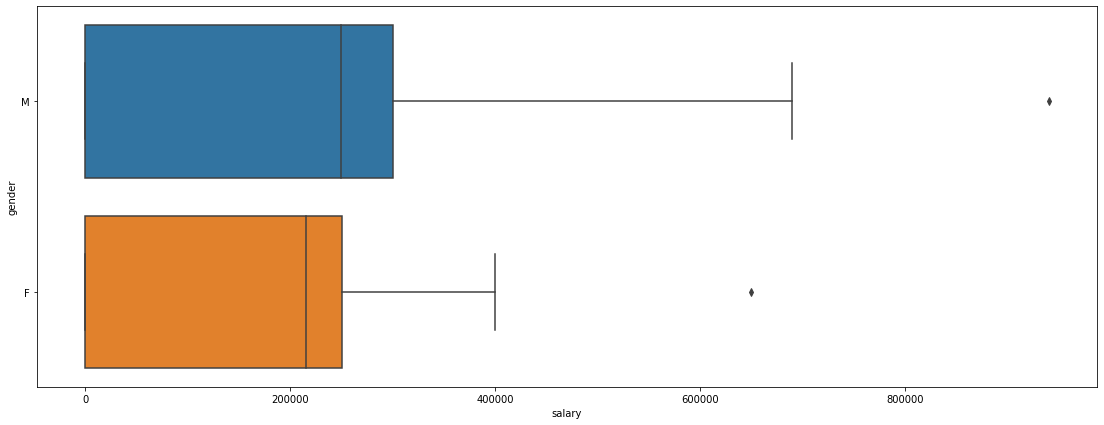

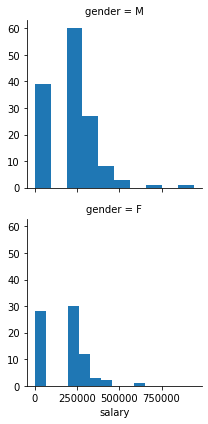

In [41]:
plot(data, 'salary', 'gender')

From the above plot I can infer the following details:

* The Range of salary is high for boys with the median of 2.5 Lakhs per annum
* The Median salary for girls is 2.1 Lakhs per annum
* The highest package is offered to a boy which is nearly 10 Lakhs per annum
* The highest package offered for girls is 7 Lakhs per annum
* Total number girls not placed are 30 and Total number of boys not placed are 40

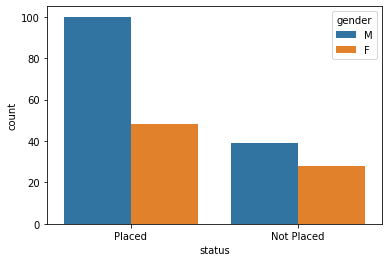

In [42]:
sns.countplot(x=data['status'], hue=data['gender'])

#### To get placed in a company with high package which board should I choose (Central or State board) in 12th?

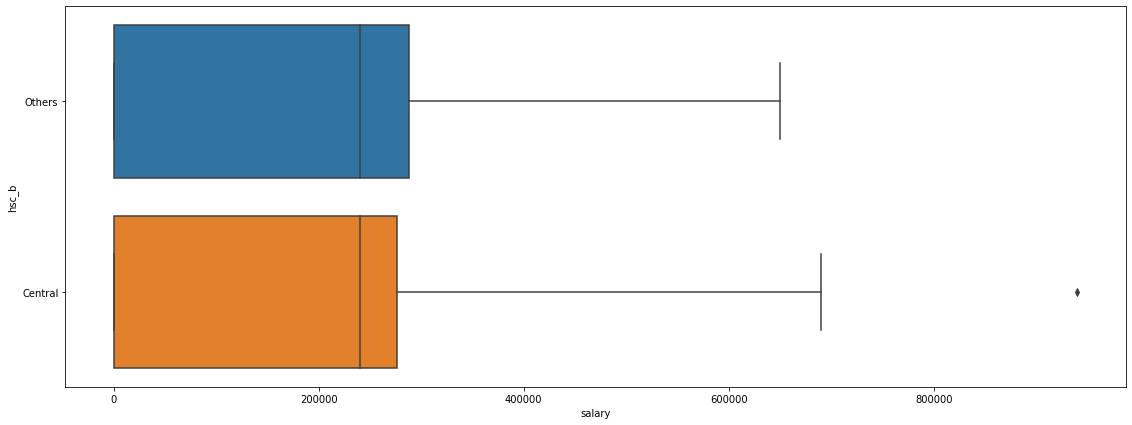

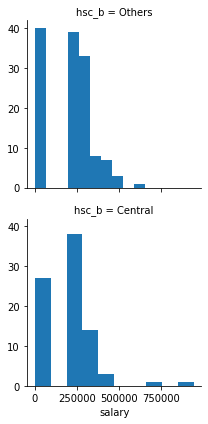

In [44]:
plot(data, 'salary', 'hsc_b')

* The Range of salary is high for central board students with the median of 2.5 Lakhs per annum
* The Median salary for other board students is 2.4 Lakhs per annum
* The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy and also his 10th board is central board
* The highest package offered for other board students is 7 Lakhs per annum
* Total number central board students not placed are 25 and Total number of other board student not placed are 40

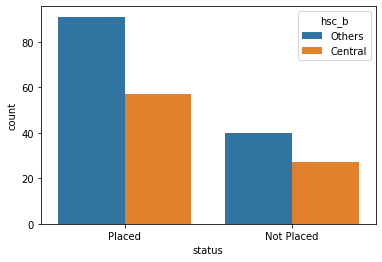

In [53]:
sns.countplot(data['status'], hue=data['hsc_b'])

#### To get placed in a company with high package which board should I choose (Central or State board) in 10th?

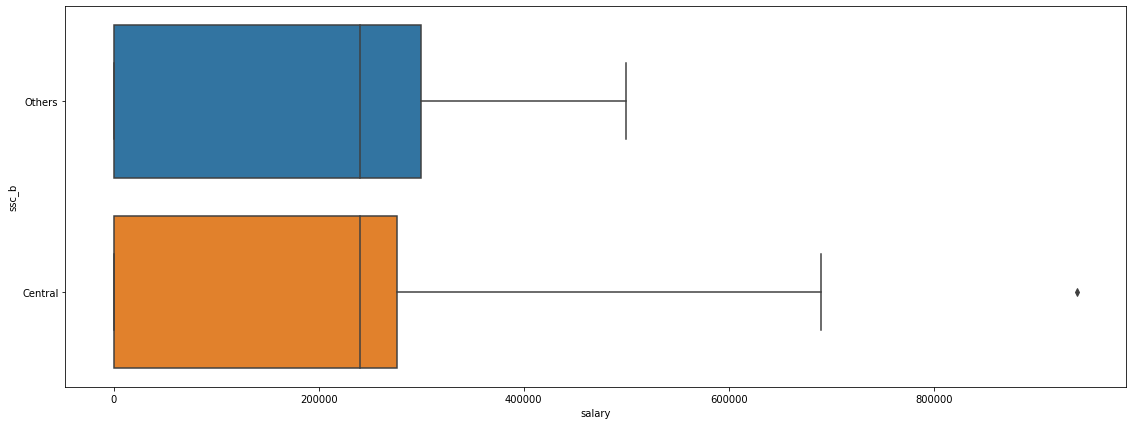

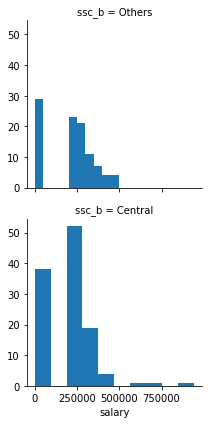

In [49]:
plot(data, 'salary', 'ssc_b')

* The Range of salary is high for central board students with the median of 2.5 Lakhs per annum
* The Median salary for other board students is 2.3 Lakhs per annum
* The highest package is offered to a central board student which is nearly 10 Lakhs per annum and as per our previous finding the student is a boy
* The highest package offered for other board students is 5 Lakhs per annum
* Total number central board students not placed are 27 and Total number of other board student not placed are 37

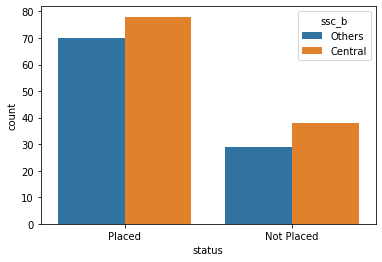

In [52]:
sns.countplot(data['status'], hue=data['ssc_b'])

#### Are the students who are doing well in 10th , doing good in 12th?

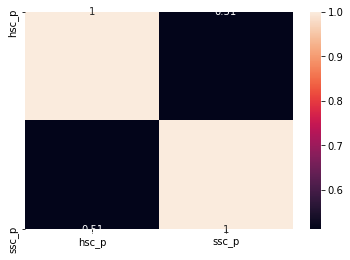

In [59]:
df = data[['hsc_p', 'ssc_p']]
corr = df.corr()
sns.heatmap(corr, annot=True)

The correlation is 0.51 which is not too strong but those who performed well in 10th have performed well in 12th also and those whose scored less than 60 in 10th have continued the same in 12th.

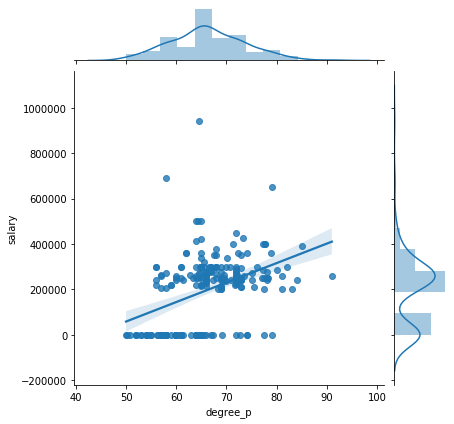

In [62]:
sns.jointplot(x='degree_p', y='salary', data=data, kind='regplot')

In [65]:
corr, _ = pearsonr(data['salary'], data['degree_p'])
print(corr)

0.40837078117656994


The correlation is very less, so the degree percentage doesn't play a vital role in getting placements.

#### Who is mostly not getting placed?

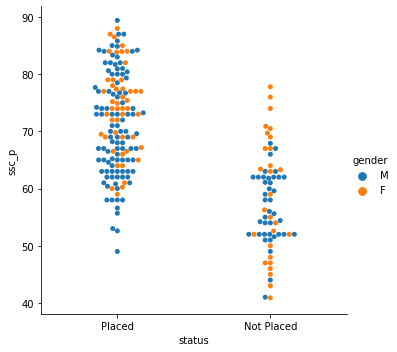

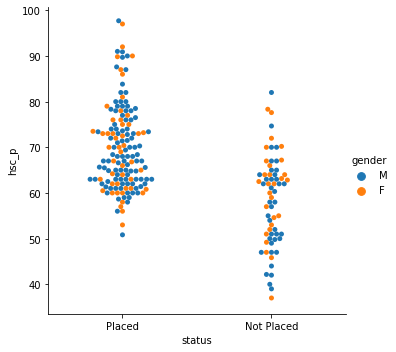

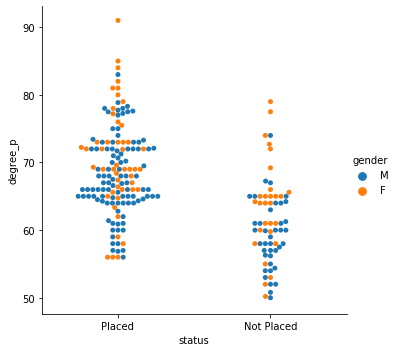

In [69]:
sns.catplot(x="status", y="ssc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=data,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=data,kind="swarm",hue='gender')

The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed because they don't even have basic eligibility(more than 60 percent in 10th,12th and degree)

#### Which stream students are getting more placed and which stream students are mostly not placed?

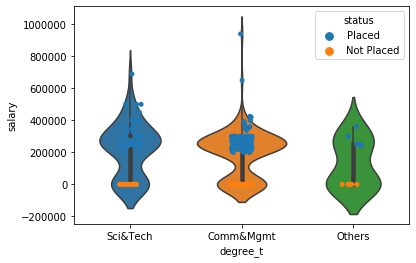

In [72]:
sns.violinplot(x='degree_t', y='salary', data=data)
sns.stripplot(x='degree_t', y='salary', data=data, hue=data['status'])

The stream in which the students mostly get placed are Commucation and management , also science and technology students are mostly getting placed and other stream students are not getting that much placements maybe due to less number of students